In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test(1) (1).csv to SalaryData_Test(1) (1).csv


In [ ]:
train=pd.read_csv("SalaryData_Train(1).csv")

In [ ]:
test=pd.read_csv("SalaryData_Test(1) (1).csv")

In [ ]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


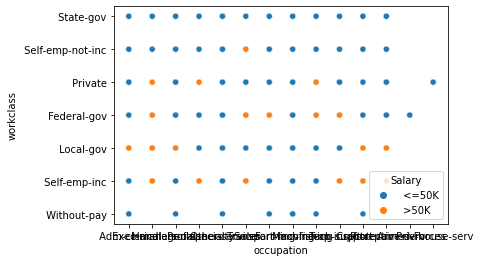

In [ ]:
sns.scatterplot(train['occupation'],train['workclass'],hue=train['Salary'])

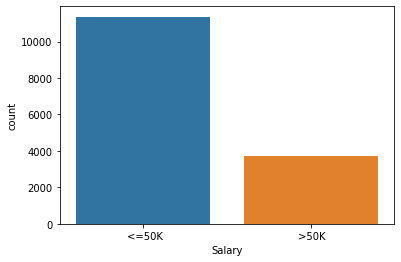

In [ ]:
sns.countplot(x='Salary',data= test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()

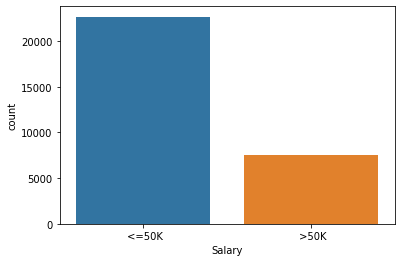

In [ ]:
sns.countplot(x='Salary',data= train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()

In [ ]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [ ]:
number = LabelEncoder()
for i in string_columns:
        train[i]= number.fit_transform(train[i])
        test[i]=number.fit_transform(test[i])

In [ ]:
train["Salary"] = number.fit_transform(train["Salary"])

In [ ]:
test["Salary"] = number.fit_transform(test["Salary"])

In [ ]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [ ]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [ ]:
train.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.080537,-0.001091,0.043525,-0.276363,-0.005682,-0.246452,0.023380,0.081972,0.080152,0.060278,0.101598,-0.001548,0.241991
workclass,0.080537,1.000000,0.017864,0.037833,-0.034235,0.015572,-0.067414,0.044734,0.074966,0.035349,0.007244,0.050723,0.007598,0.018040
education,-0.001091,0.017864,1.000000,0.345420,-0.040704,-0.038213,-0.012732,0.011139,-0.027831,0.030582,0.014822,0.059892,0.079715,0.079013
educationno,0.043525,0.037833,0.345420,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006155,0.124416,0.079691,0.152522,0.092625,0.335287
maritalstatus,-0.276363,-0.034235,-0.040704,-0.063419,1.000000,0.022655,0.177955,-0.068641,-0.119774,-0.042414,-0.035385,-0.189004,-0.026057,-0.193504
occupation,-0.005682,0.015572,-0.038213,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062316,0.022162,0.014612,0.018365,-0.003298,0.051577
relationship,-0.246452,-0.067414,-0.012732,-0.091935,0.177955,-0.053727,1.000000,-0.117148,-0.584881,-0.058257,-0.063659,-0.257850,-0.010661,-0.250998
race,0.023380,0.044734,0.011139,0.032805,-0.068641,0.000717,-0.117148,1.000000,0.089207,0.014355,0.023461,0.048533,0.126507,0.071666
sex,0.081972,0.074966,-0.027831,0.006155,-0.119774,0.062316,-0.584881,0.089207,1.000000,0.048809,0.047285,0.231272,0.000063,0.216680
capitalgain,0.080152,0.035349,0.030582,0.124416,-0.042414,0.022162,-0.058257,0.014355,0.048809,1.000000,-0.032218,0.080431,0.008513,0.221195


In [ ]:
test.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.096037,-0.007948,0.026123,-0.262577,-0.002214,-0.249701,0.024485,0.082265,0.078760,0.057745,0.102758,-0.005683,0.227469
workclass,0.096037,1.000000,0.018005,0.046623,-0.031329,0.021271,-0.060235,0.059749,0.059161,0.032980,0.010242,0.052614,-0.003635,0.011008
education,-0.007948,0.018005,1.000000,0.351486,-0.043117,-0.023999,-0.014227,0.012133,-0.026978,0.028626,0.020568,0.062892,0.077065,0.085554
educationno,0.026123,0.046623,0.351486,1.000000,-0.068079,0.093643,-0.081413,0.029355,-0.002052,0.131750,0.085817,0.133691,0.097188,0.327813
maritalstatus,-0.262577,-0.031329,-0.043117,-0.068079,1.000000,0.003854,0.185495,-0.073718,-0.120374,-0.042405,-0.034073,-0.171665,-0.016532,-0.191058
occupation,-0.002214,0.021271,-0.023999,0.093643,0.003854,1.000000,-0.047381,-0.001561,0.045244,0.014165,0.016580,0.011755,-0.001311,0.046218
relationship,-0.249701,-0.060235,-0.014227,-0.081413,0.185495,-0.047381,1.000000,-0.121481,-0.579212,-0.054040,-0.048091,-0.261905,0.000500,-0.258335
race,0.024485,0.059749,0.012133,0.029355,-0.073718,-0.001561,-0.121481,1.000000,0.088450,0.013539,0.015799,0.037125,0.125514,0.069227
sex,0.082265,0.059161,-0.026978,-0.002052,-0.120374,0.045244,-0.579212,0.088450,1.000000,0.044843,0.045360,0.231744,-0.014178,0.213863
capitalgain,0.078760,0.032980,0.028626,0.131750,-0.042405,0.014165,-0.054040,0.013539,0.044843,1.000000,-0.031876,0.090501,0.005923,0.220882


In [ ]:
colnames = train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            15060 non-null  int64
 1   workclass      15060 non-null  int64
 2   education      15060 non-null  int64
 3   educationno    15060 non-null  int64
 4   maritalstatus  15060 non-null  int64
 5   occupation     15060 non-null  int64
 6   relationship   15060 non-null  int64
 7   race           15060 non-null  int64
 8   sex            15060 non-null  int64
 9   capitalgain    15060 non-null  int64
 10  capitalloss    15060 non-null  int64
 11  hoursperweek   15060 non-null  int64
 12  native         15060 non-null  int64
 13  Salary         15060 non-null  int64
dtypes: int64(14)
memory usage: 1.6 MB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            30161 non-null  int64
 1   workclass      30161 non-null  int64
 2   education      30161 non-null  int64
 3   educationno    30161 non-null  int64
 4   maritalstatus  30161 non-null  int64
 5   occupation     30161 non-null  int64
 6   relationship   30161 non-null  int64
 7   race           30161 non-null  int64
 8   sex            30161 non-null  int64
 9   capitalgain    30161 non-null  int64
 10  capitalloss    30161 non-null  int64
 11  hoursperweek   30161 non-null  int64
 12  native         30161 non-null  int64
 13  Salary         30161 non-null  int64
dtypes: int64(14)
memory usage: 3.2 MB


In [ ]:
train1=train.iloc[:2000,:]

In [ ]:
test1=test.iloc[:1300,:]

In [ ]:
x_train=train1.iloc[:,1:13]
y_train=train1.iloc[:,13]
x_test=test1.iloc[:,1:13]
y_test=test1.iloc[:,13]

In [ ]:
x_train

,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,5,9,13,4,0,1,4,1,2174,0,40,37
1,4,9,13,2,3,0,4,1,0,0,13,37
2,2,11,9,0,5,1,4,1,0,0,40,37
3,2,1,7,2,5,0,2,1,0,0,40,37
4,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2,11,9,5,10,3,4,0,0,0,40,37
1996,2,11,9,2,6,0,4,1,0,0,40,37
1997,2,6,5,2,13,0,4,1,0,0,40,37
1998,2,11,9,2,11,0,4,1,0,0,48,37


In [ ]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    1
Name: Salary, Length: 2000, dtype: int64

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.3)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1400, 12), (600, 12), (1400,), (600,))

In [ ]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[100,50,0.5,0.1,0.01,0.001,0.0001],
               'C':[15,14,13,12,11,10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001, 0.0001],
                          'gamma': [100, 50, 0.5, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}])

In [ ]:
gsv.best_params_,gsv.best_score_

({'C': 15, 'gamma': 0.001, 'kernel': 'rbf'}, 0.8185714285714285)

In [ ]:
clf=SVC(C=15,gamma=0.001)
clf.fit(x_train,y_train)
y_pred_train=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred_train)*100
print('Accuracy=',acc)
print(confusion_matrix(y_train,y_pred_train))


Accuracy= 83.78571428571429
[[1052    4]
 [ 223  121]]


In [ ]:
y_pred_test=clf.predict(x_test)
acc=accuracy_score(y_pred_test,y_test)
print('Accuracy=',acc)
print(confusion_matrix(y_test,y_pred_test))

Accuracy= 0.7966666666666666
[[425   5]
 [117  53]]
